In [1]:
import random

In [2]:
def generate_sentence(grammar_rules: str, target, stmt_split='=', expr_split='|'):
    """
    产生句子
    """
    grammar_rules_dict = parse_grammar_rules(grammar_rules, stmt_split, expr_split)

    return random_genrate_sentence(grammar_rules_dict, target)

In [3]:
def parse_grammar_rules(grammar_rules: str, stmt_split='=', expr_split='|'):
    """
    解析语法规则
    """
    grammar_rules_dict = {}
    for line in grammar_rules.split('\n'):
        if line:
            stmt, expr = line.split(stmt_split)
            grammar_rules_dict[stmt.strip()] = expr.split(expr_split)
    return grammar_rules_dict;

In [5]:
def random_genrate_sentence(grammar_rules: dict, target):
    """
    随机产生句子
    """
    if target in grammar_rules:
        candidate = random.choice(grammar_rules[target])
        return ''.join(random_genrate_sentence(grammar_rules, e.strip()) for e in candidate.split())
    else:
        return target

In [6]:
geetings_rules = """
say_hello = names hello tail
names = name names | name
name = Jhon | Mike | 老梁 | 老刘
hello = 你好 | 您来啦 | 快请进
tail = 呀 | !
"""

In [7]:
parse_grammar_rules(geetings_rules)

{'say_hello': [' names hello tail'],
 'names': [' name names ', ' name'],
 'name': [' Jhon ', ' Mike ', ' 老梁 ', ' 老刘'],
 'hello': [' 你好 ', ' 您来啦 ', ' 快请进'],
 'tail': [' 呀 ', ' !']}

In [8]:
generate_sentence(geetings_rules, 'say_hello')

'Mike您来啦呀'

In [9]:

simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的"""
generate_sentence(simple_grammar, 'sentence', stmt_split='=>')

'这个好看的蓝色的女人听着一个小小的好看的蓝色的小猫'

In [10]:
when_grammar_rules = """
when_stmt => when ( condition ): stmt
condition => var op var | u_op var
op => > | < | == | >= | <=
u_op => !
var => char var | char
char => a | b | c | d | e | f
stmt => assign | when_stmt
assign => var = 2 | var = 3 | var = 4 | var = 5
"""

generate_sentence(when_grammar_rules, 'when_stmt', stmt_split='=>')

'when(bd<e):c=4'

# 2-gram Language Model
$$ language\_model(String) = Probability(String) \in (0, 1) $$
$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w_2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$
$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$

In [11]:
import jieba
words = jieba.cut('基于前缀词典实现高效的词图扫描，生成句子中汉字所有可能成词情况所构成的有向无环图 (DAG)')
for word in words:
    print(word)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ZENGYU~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.131 seconds.
Prefix dict has been built succesfully.


基于
前缀
词典
实现
高效
的
词图
扫描
，
生成
句子
中
汉字
所有
可能
成词
情况
所
构成
的
有
向
无
环图
 
(
DAG
)


In [12]:
en_words = jieba.cut('基于前缀词典实现高效的词图扫描The Pursuit of Happyness生成句子中汉字所有可能成词情况所构成的有向无环图')
for word in en_words:
    print(word)

基于
前缀
词典
实现
高效
的
词图
扫描
The
 
Pursuit
 
of
 
Happyness
生成
句子
中
汉字
所有
可能
成词
情况
所
构成
的
有
向
无
环图


In [13]:
from collections import Counter

def generate_2_gram_words_count(sample_file_path: str, unit_length=1000000):
    words_count = {}
    two_gram_words_count = {}
    with open(sample_file_path, encoding='utf-8') as sample_file:
        sample = sample_file.read()
        begin_index = 0
        while begin_index < len(sample):
            words = cut(sample[begin_index:(begin_index + unit_length)])
            _generate_2_gram_words_count(words, words_count, two_gram_words_count)
            begin_index = begin_index + unit_length
    return words_count, two_gram_words_count

def cut(sentence):
    return list(jieba.cut(sentence))

def _generate_2_gram_words_count(words: list, words_count: dict, two_gram_words_count: dict):
    _words_count = Counter(words)
    for w, f in _words_count.most_common():
        if w in words_count:
            words_count[w] = words_count[w] + f
        else:
            words_count[w] = f
    
    tow_gram_words = [words[i] + words[i + 1] for i in range(0, len(words) - 1)]
    _tow_gram_words_count = Counter(tow_gram_words)
    for tgw, f in _tow_gram_words_count.most_common():
        if tgw in two_gram_words_count:
            two_gram_words_count[tgw] = two_gram_words_count[tgw] + f
        else:
            two_gram_words_count[tgw] = f
            
        

In [14]:
words = cut('基于前缀词典实现高效的词图扫描，生成句子中汉字所有可能成词情况所构成的有向无环图 (DAG)')
# print(words)
words_count = {}
two_gram_words_count = {}
_generate_2_gram_words_count(words, words_count, two_gram_words_count)
print(words_count)
print(two_gram_words_count)

{'的': 2, '基于': 1, '前缀': 1, '词典': 1, '实现': 1, '高效': 1, '词图': 1, '扫描': 1, '，': 1, '生成': 1, '句子': 1, '中': 1, '汉字': 1, '所有': 1, '可能': 1, '成词': 1, '情况': 1, '所': 1, '构成': 1, '有': 1, '向': 1, '无': 1, '环图': 1, ' ': 1, '(': 1, 'DAG': 1, ')': 1}
{'基于前缀': 1, '前缀词典': 1, '词典实现': 1, '实现高效': 1, '高效的': 1, '的词图': 1, '词图扫描': 1, '扫描，': 1, '，生成': 1, '生成句子': 1, '句子中': 1, '中汉字': 1, '汉字所有': 1, '所有可能': 1, '可能成词': 1, '成词情况': 1, '情况所': 1, '所构成': 1, '构成的': 1, '的有': 1, '有向': 1, '向无': 1, '无环图': 1, '环图 ': 1, ' (': 1, '(DAG': 1, 'DAG)': 1}


In [16]:
sample_file_path = 'D:\\Users\\ZengYubin\\study\\nlp-coures\\github\\2019-autumn\\article_9k.txt'
words_count, two_gram_words_count = generate_2_gram_words_count(sample_file_path)

In [17]:
len(words_count)
# words_count_keys = list(words_count.keys())
# words_count_keys[0]
words_count['公开赛']

7199

In [18]:
import matplotlib.pyplot as plt
plt.plot(list(words_count.values()))

D:\Users\ZengYubin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


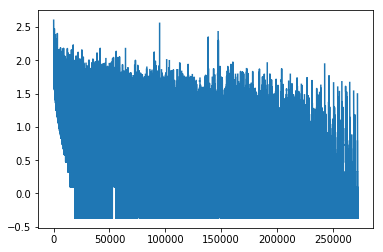

In [19]:
import numpy as np
plt.plot(np.log(np.log(list(words_count.values()))))

In [20]:
np.sort(np.array(list(words_count.values())))[-3:]

array([263597, 382020, 703716])

In [21]:
def calculate_probability_of_sentence_by_two_gram(sentence: str, words_count: dict, two_gram_words_count: dict):
    words = cut(sentence)
    probability = 1
    for i in range(0, len(words) - 1):
        probability *= _calculate_probability_of_sentence(words[i], words[i + 1], words_count, two_gram_words_count)
    return probability

def _calculate_probability_of_sentence(w1: str, w2: str, words_count: dict, two_gram_words_count: dict):
    w1w2 = w1 + w2
    if w2 not in words_count:
        words_count[w2] = 1
        two_gram_words_count[w1w2] = 1
    elif w1w2 not in two_gram_words_count:
        two_gram_words_count[w1w2] = 1
    return two_gram_words_count[w1w2] / words_count[w2]

In [22]:
def local_calculate_probability_of_sentence(sentence: str):
    return calculate_probability_of_sentence_by_two_gram(sentence, words_count, two_gram_words_count)

In [23]:
local_calculate_probability_of_sentence('此外自本周6月12日起除小米手机6等15款机型')

4.74121300394843e-37

In [24]:
local_calculate_probability_of_sentence('前天早上吃晚饭的时候')

6.239387998125227e-10

In [25]:
local_calculate_probability_of_sentence('前天早上吃早饭的时候')

2.3509374521948863e-13

In [26]:
local_calculate_probability_of_sentence('发的接打老刘法发发大厦附近')

6.410913456772163e-19

In [27]:
local_calculate_probability_of_sentence('从落地到生根的伟大实践')

8.694432504536294e-14

In [28]:
print(local_calculate_probability_of_sentence('美联储主席本.伯南昨天告诉媒体7000亿美元的救助金将借给上百家银行、保险公司和汽车公司'))
local_calculate_probability_of_sentence('本.伯南美联储主席昨天7000亿美元的救助金告诉媒体将借给银行、保险公司和汽车公司上百家')

# local_calculate_probability_of_sentence('从落地到生根的伟大实践')
# local_calculate_probability_of_sentence('从落地到生根的伟大实践')

7.2887319454899265e-50


6.850273889972333e-48

# 3-gram Language Model
$$ language\_model(String) = Probability(String) \in (0, 1) $$
$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w_2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$
$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2w_3 ) * P(w2 | w_3w_4 )$$

In [29]:
def generate_3_gram_words_count(sample_file_path: str, unit_length=1000000):
    two_gram_words_count = {}
    three_gram_words_count = {}
    with open(sample_file_path, encoding='utf-8') as sample_file:
        sample = sample_file.read()
        begin_index = 0
        while begin_index < len(sample):
            words = cut(sample[begin_index:(begin_index + unit_length)])
            _generate_3_gram_words_count(words, two_gram_words_count, three_gram_words_count)
            begin_index = begin_index + unit_length
    return two_gram_words_count, three_gram_words_count

def _generate_3_gram_words_count(words: list, two_gram_words_count: dict, three_gram_words_count: dict):

    tow_gram_words = [words[i] + words[i + 1] for i in range(0, len(words) - 1)]
    _tow_gram_words_count = Counter(tow_gram_words)
    for tgw, f in _tow_gram_words_count.most_common():
        if tgw in two_gram_words_count:
            two_gram_words_count[tgw] += f
        else:
            two_gram_words_count[tgw] = f
            
    three_gram_words = [words[i] + words[i + 1] + words[i + 2] for i in range(0, len(words) - 2)]
    _three_gram_words_count = Counter(three_gram_words)
    for tgw, f in _three_gram_words_count.most_common():
        if tgw in three_gram_words_count:
            three_gram_words_count[tgw] += f
        else:
            three_gram_words_count[tgw] = f